## Quiz #0503

### "Data Augmentation"

#### Answer the following questions by providing Python code:
#### Objectives:
- Code the helper functions.
- Optimize and test a predictive model of your choice.
- Carry out data aumentation in order to improve the predictive accuracy when the given training data is small.

In [1]:
import numpy as np
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics, preprocessing
from scipy.ndimage.interpolation import rotate
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

#### Read in data:
The explanation on the original data can be found [here](http://yann.lecun.com/exdb/mnist/).

- The data we will be using is a small subset of the original data with only 100 observations.
- Each observation is the "flattened" version of a image.
- The first column corresponds to the label (Y).
- The image size is 28x28.

In [2]:
# Read the training and testing data separately.
data_train = pd.read_csv('data_mnist_train_100.csv', header=None,encoding='latin1')
data_test = pd.read_csv('data_mnist_test_100.csv', header=None,encoding='latin1')

# Scale and split the data set into X and Y.
X_train = np.array((data_train.iloc[:,1:]/255.0)*0.99+0.01)
X_test = np.array((data_test.iloc[:,1:]/255.0)*0.99+0.01)
Y_train = np.array(data_train.iloc[:,0])
Y_test = np.array(data_test.iloc[:,0])


1). Code the helper function 'show_data()' that visualizes each given observation. HINT: use matplotlib.pyplot.imshow() and scipy.ndimage.interpolation().

In [3]:
def show_data(X, Y, n, angle=0):
    print(Y[n])
    img= rotate(X[n].reshape(28,28), angle, reshape=False)
    plt.imshow(1-img, cmap='gray')
    plt.show()

3


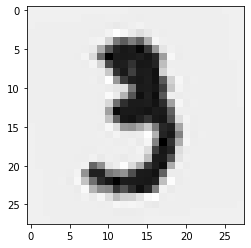

In [4]:
# Example 1.
show_data(X_train, Y_train,10,+10)

3


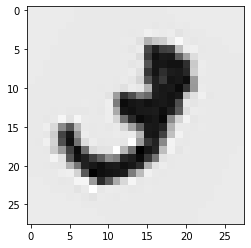

In [5]:
# Example 2.
show_data(X_train, Y_train,10,-30)

1


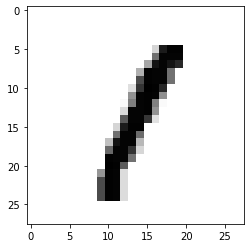

In [6]:
# Example 3.
show_data(X_train, Y_train,77,0)

2). Choose an algorithm and carry out the predictive analysis.

- Optimize the hyperparameter(s).
- Calculate the accuracy.
- Is the accuracy high enough?

In [7]:
accuracies=[0]
for n_estimators in range(1,100):
    model=RandomForestClassifier(n_estimators)  #Creating a random forest with 100 decision trees
    model.fit(X_train, Y_train)  #Training our model
    Y_pred=model.predict(X_test)  #testing our model
    if metrics.accuracy_score(Y_test, Y_pred)> max(accuracies):
        best=n_estimators
    accuracies.append(metrics.accuracy_score(Y_test,Y_pred))
print("Number of estimators:",best)
print("Accuracy:", max(accuracies))

Number of estimators: 91
Accuracy: 0.74


The accuracy is not high enough.

3). Code the helper function 'rotate_data()' that rotates each given observation by an angle. HINT: use scipy.ndimage.interpolation().

In [8]:
def rotate_data(X, n, angle=0):
    rotated = rotate(X[n].reshape(28,28), angle, reshape=False)
    return rotated.reshape(1,28*28)


4). Augment the training dataset.
- Increase the size of the training dataset by introducing slight rotations (clockwise and counterclockwise).
- Use the 'rotate_data()' function defined in the previous step.
- No need to augment the testing dataset.
- Target approximately five fold aumentation.

In [9]:
for n in range(100):
    for angle in range(-30,30,3):
        rotated = rotate_data(X_train,n,angle)
        X_train=np.append(X_train,rotated,axis=0)
        Y_train=np.append(Y_train,Y_train[n])

In [10]:
len(X_train)

2100

5). Redo the predictive analysis with the augmented training dataset.

- Use the same algorithm as in the step 2).
- Calculate the accuracy.
- Has the accuracy gone up?

In [11]:
accuracies=[0]
for n_estimators in range(1,60):
    model=RandomForestClassifier(n_estimators)  #Creating a random forest with 60 decision trees
    model.fit(X_train, Y_train)  #Training our model
    Y_pred=model.predict(X_test)  #testing our model
    if metrics.accuracy_score(Y_test, Y_pred)> max(accuracies):
        best=n_estimators
    accuracies.append(metrics.accuracy_score(Y_test,Y_pred))
print("Number of estimators:",best)
print("Accuracy:", max(accuracies))

Number of estimators: 51
Accuracy: 0.78


Yes the accuracy has gone up.